## Data Viz Lab

#### Credit goes to Matthew for all the first part

The human visual system is a massively parallel processor that provides the highest bandwidth channel into our cognitive centers. Hundreds of thousands of different entities can be identified in images with only ~100 ms of processing by a decahertz processor (neuron). As with any parallel system, feeding (streaming) data into this network needs to be optimal: too little information (either through too little data or too much noise) and the false positive classification rate is very high (pareidolia):
<figure>
<!--
<img src='https://upload.wikimedia.org/wikipedia/commons/7/77/Martian_face_viking_cropped.jpg'/>
<img src='http://www.enterprisemission.com/images/cydgeom3.jpg'/ width = "50%"/>
-->
<img src='http://img.thesun.co.uk/aidemitlum/archive/02440/01_06154606_101ca1_2440012a.jpg'/>
<img src='http://1.bp.blogspot.com/-_1JcwG6jHzE/VcFt1qJBF8I/AAAAAAAAd1Y/RqPTSmOdkwM/s1600/ship%252C%2BUFO%252C%2BUFOs%252C%2Bsighting%252C%2Bsightings%252C%2Balien%252C%2Baliens%252C%2BET%252C%2Brainbow%252C%2Bstar%2Bwars%252C%2B2015%252C%2Bnews%252C%2Bearth%252C%2Bvolcano%252C%2Bmexico%252C%2Bbicycle%252C%2Blady%252C%2Bdeathstar%252C%2Bwoman%252C%2Bfigure%252C%2Bjennifer%252C%2Baniston%252C%2Bwater%252C%2Blife%252C%2Bmars12.png'/>
<figcaption style="text-align:left"><b>Our brains have evolved to see signal even there is just noise</b></figcaption>
</figure>
Too much information and the processors become overwhelmed with a corresponding drop in the classification rate:
<figure>
<img src="http://drive.google.com/uc?export=view&id=0B2iketVpbishSC1CZ1R1eHB3eUk" width = '80%'/>
<figcaption style="text-align:left"><b>Can you find Matthew Graham in this picture?</b></figcaption>
</figure>
Visualization is therefore an essential aspect of data science not only for presenting results but also for identifying and exploring relationships between entities, e.g., sets of variables.

In [1]:
%matplotlib notebook 
#inline, gtk, qt
import matplotlib.pyplot as plt
import numpy as np

## Scatter plot

The most basic data visualization is arguably the scatter plot showing the relationship between the members of a set of variables. 
<figure>
<img src="http://www.datavis.ca/gallery/langren/langren-google-overlay.jpg"/>
<figcaption><b>The first visual representation of statistical data by Michael van Langren in 1644 showing various estimates of the longitude distance from Toledo to Rome</b></figcaption>
</figure>
Let's start with just a basic scatter plot of some random coordinates (you could choose any data set to hand, however)

<IPython.core.display.Javascript object>


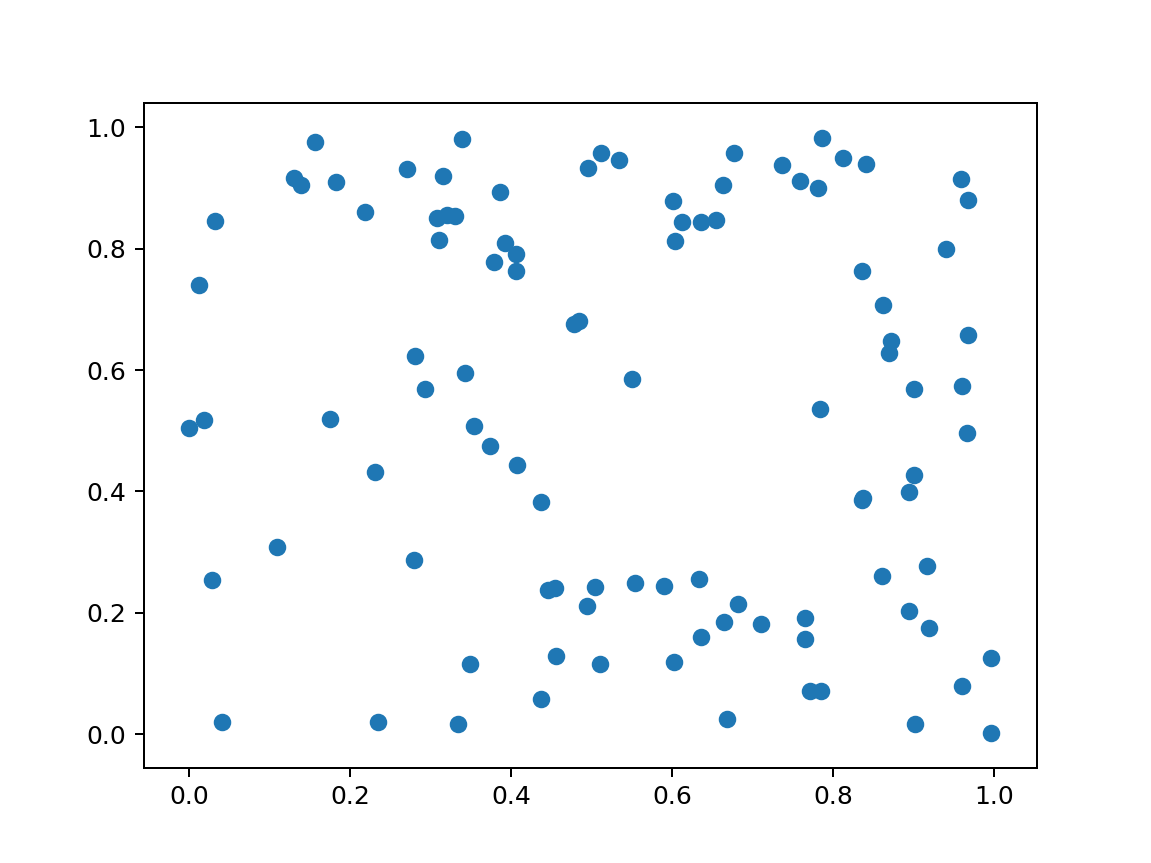

In [2]:
x, y = np.random.random([2, 100])
plt.scatter(x, y)


In addition to working interactively, we can change the marker, add labels to the axes, change the ranges plotted, add a grid, and a title:

** but remember to stop the interaction with the previous plot**

<IPython.core.display.Javascript object>


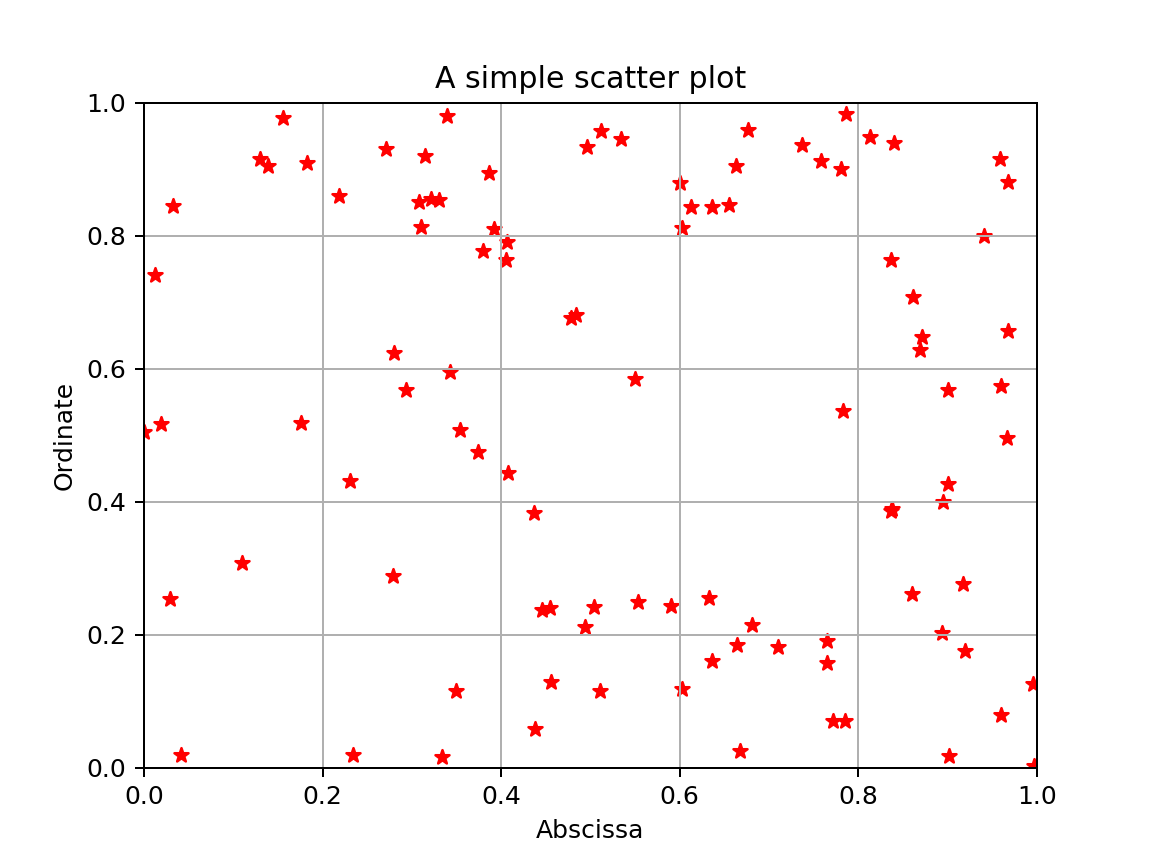

In [3]:
plt.scatter(x, y, marker = '*', color = 'r', s = 35)
plt.xlabel('Abscissa')
plt.ylabel('Ordinate')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.grid(True)
plt.title('A simple scatter plot')

Of course, our variables are normally measured quantities and these have errors associated with them so we'll generate some and replot: 



<IPython.core.display.Javascript object>


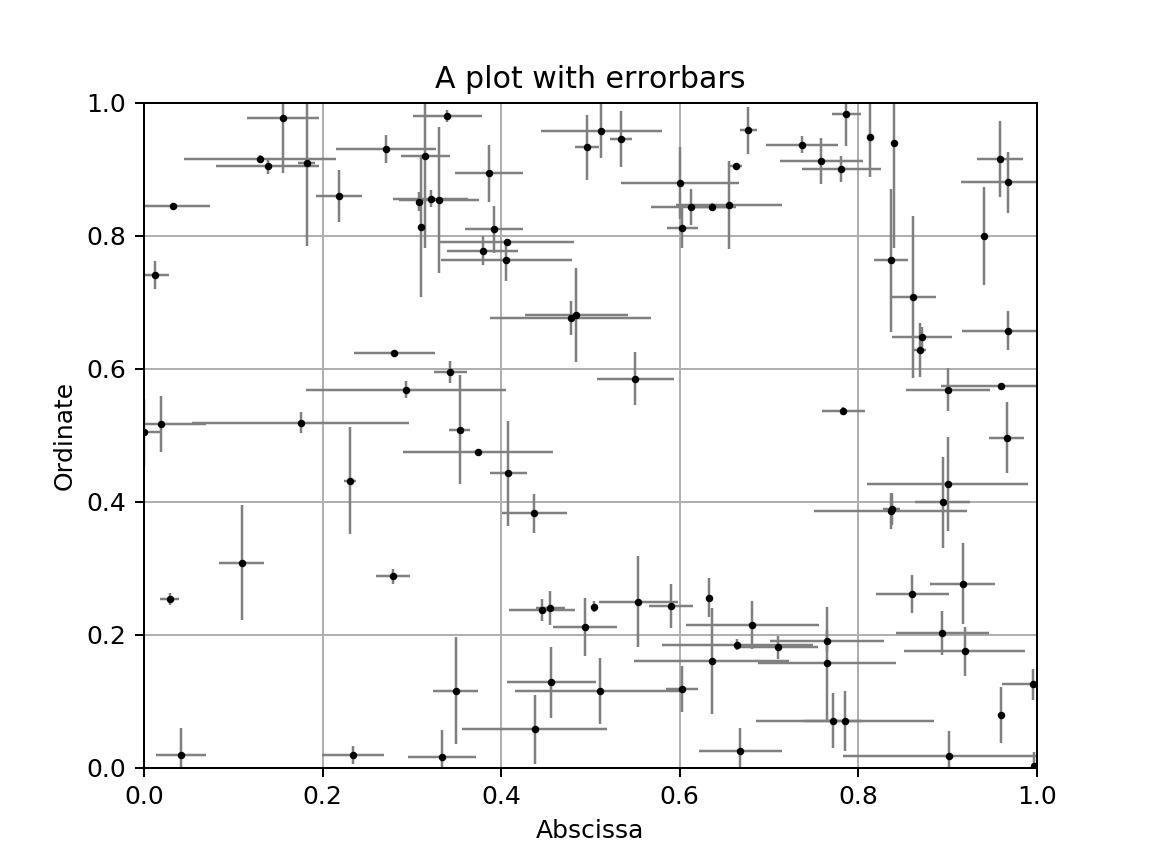

In [4]:
xerr = np.random.normal(0., 0.05, 100)
yerr = np.random.normal(0., 0.05, 100)
plt.errorbar(x, y, xerr, yerr, fmt = '.k', ecolor = 'gray', lw = 1, ms = 4)
plt.xlabel('Abscissa')
plt.ylabel('Ordinate')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.grid(True)
plt.title('A plot with errorbars')

OK, so what happens when instead of 100 data points, we have 100,000. In this case, we will be overwhelmed by a simple scatter plot and need to do something to make the visual more manageable. One option is to reduce the transparency (and size) of the markers which can be particularly useful if you plotting some other smaller distribution on top:

<IPython.core.display.Javascript object>


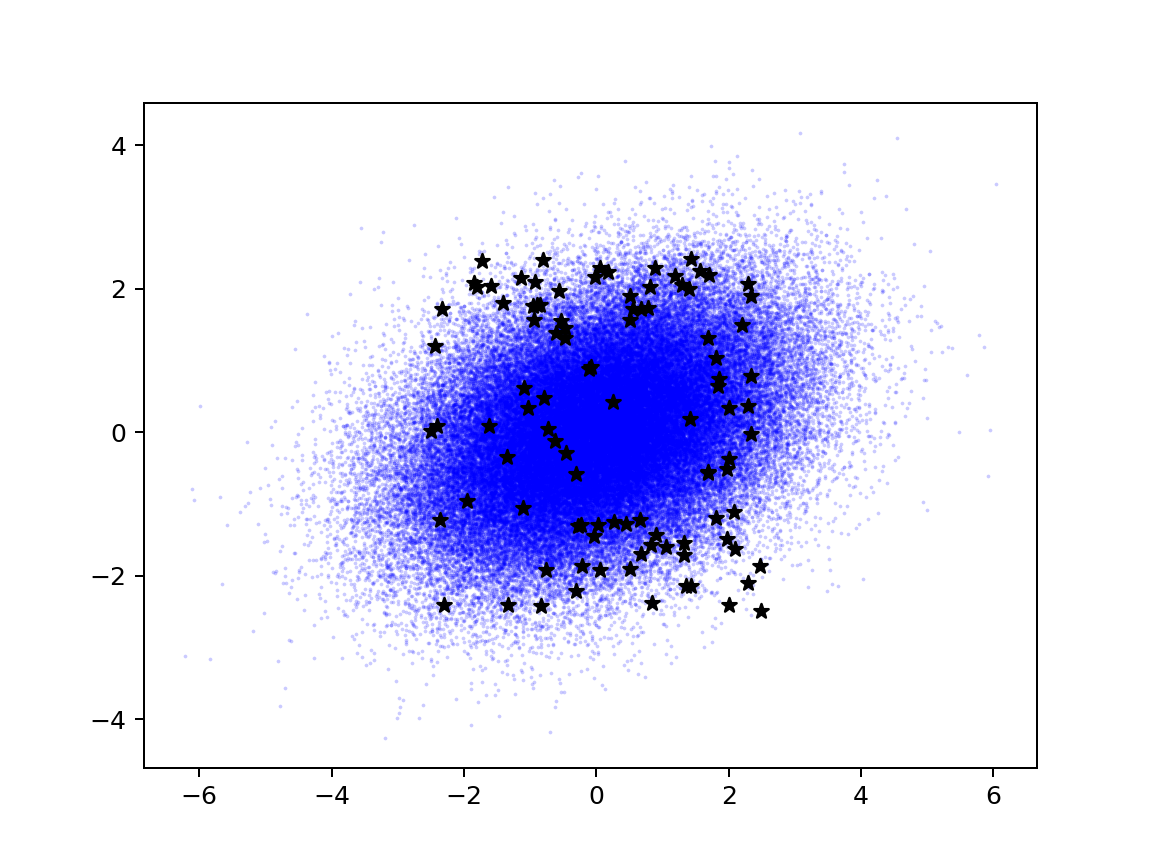

In [5]:
mean, cov = [0., 0.], [(2., 0.5), (0.5, 1.)] 
data = np.random.multivariate_normal(mean, cov, 100000)
a, b = data.T
plt.scatter(a, b, marker = '.', color = 'b', s = 1, alpha = 0.2)
plt.scatter(5. * x - 2.5, 5. * y - 2.5, marker = '*', color = 'k')

Often what we're really interested in these cases is getting some idea of where the densest regions are. Matplotlib has routines such as <i>hexbin</i> and <i>contour</i> which can be used to plot binned values and contours but you have to calculate the various plotted quantities yourself. An alternate option is to use the Python package <a href="http://stanford.edu/~mwaskom/software/seaborn/index.html">seaborn</a> which sits on top of matplotlib.

Let's first look at a hexbin plot:

<IPython.core.display.Javascript object>


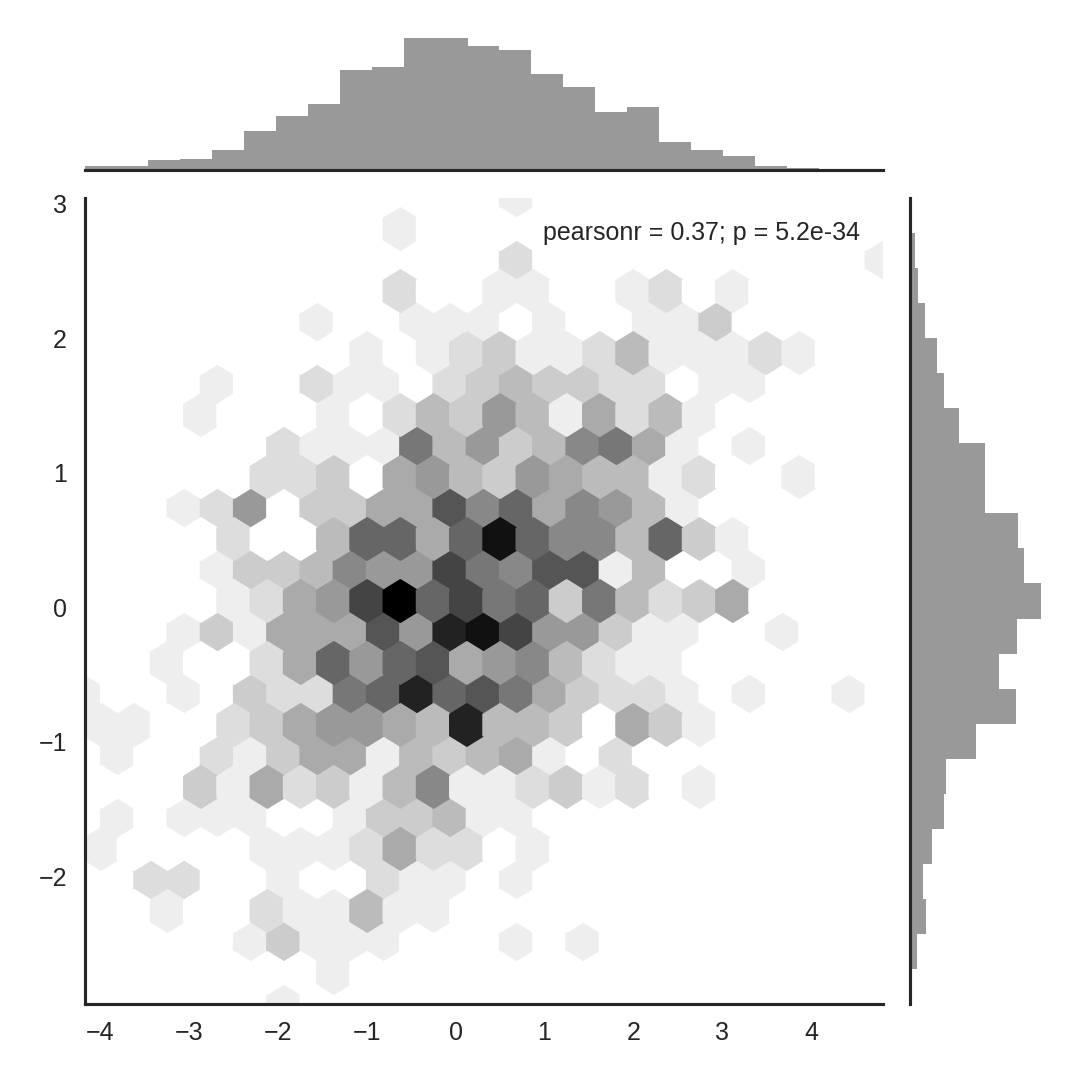

In [6]:
import seaborn as sns
sns.set(color_codes = False)
with sns.axes_style("white"):
    sns.jointplot(x = a[:1000], y = b[:1000], kind = 'hex', color = 'k')

and a density estimate can be provided using a kernel density estimator:

<IPython.core.display.Javascript object>


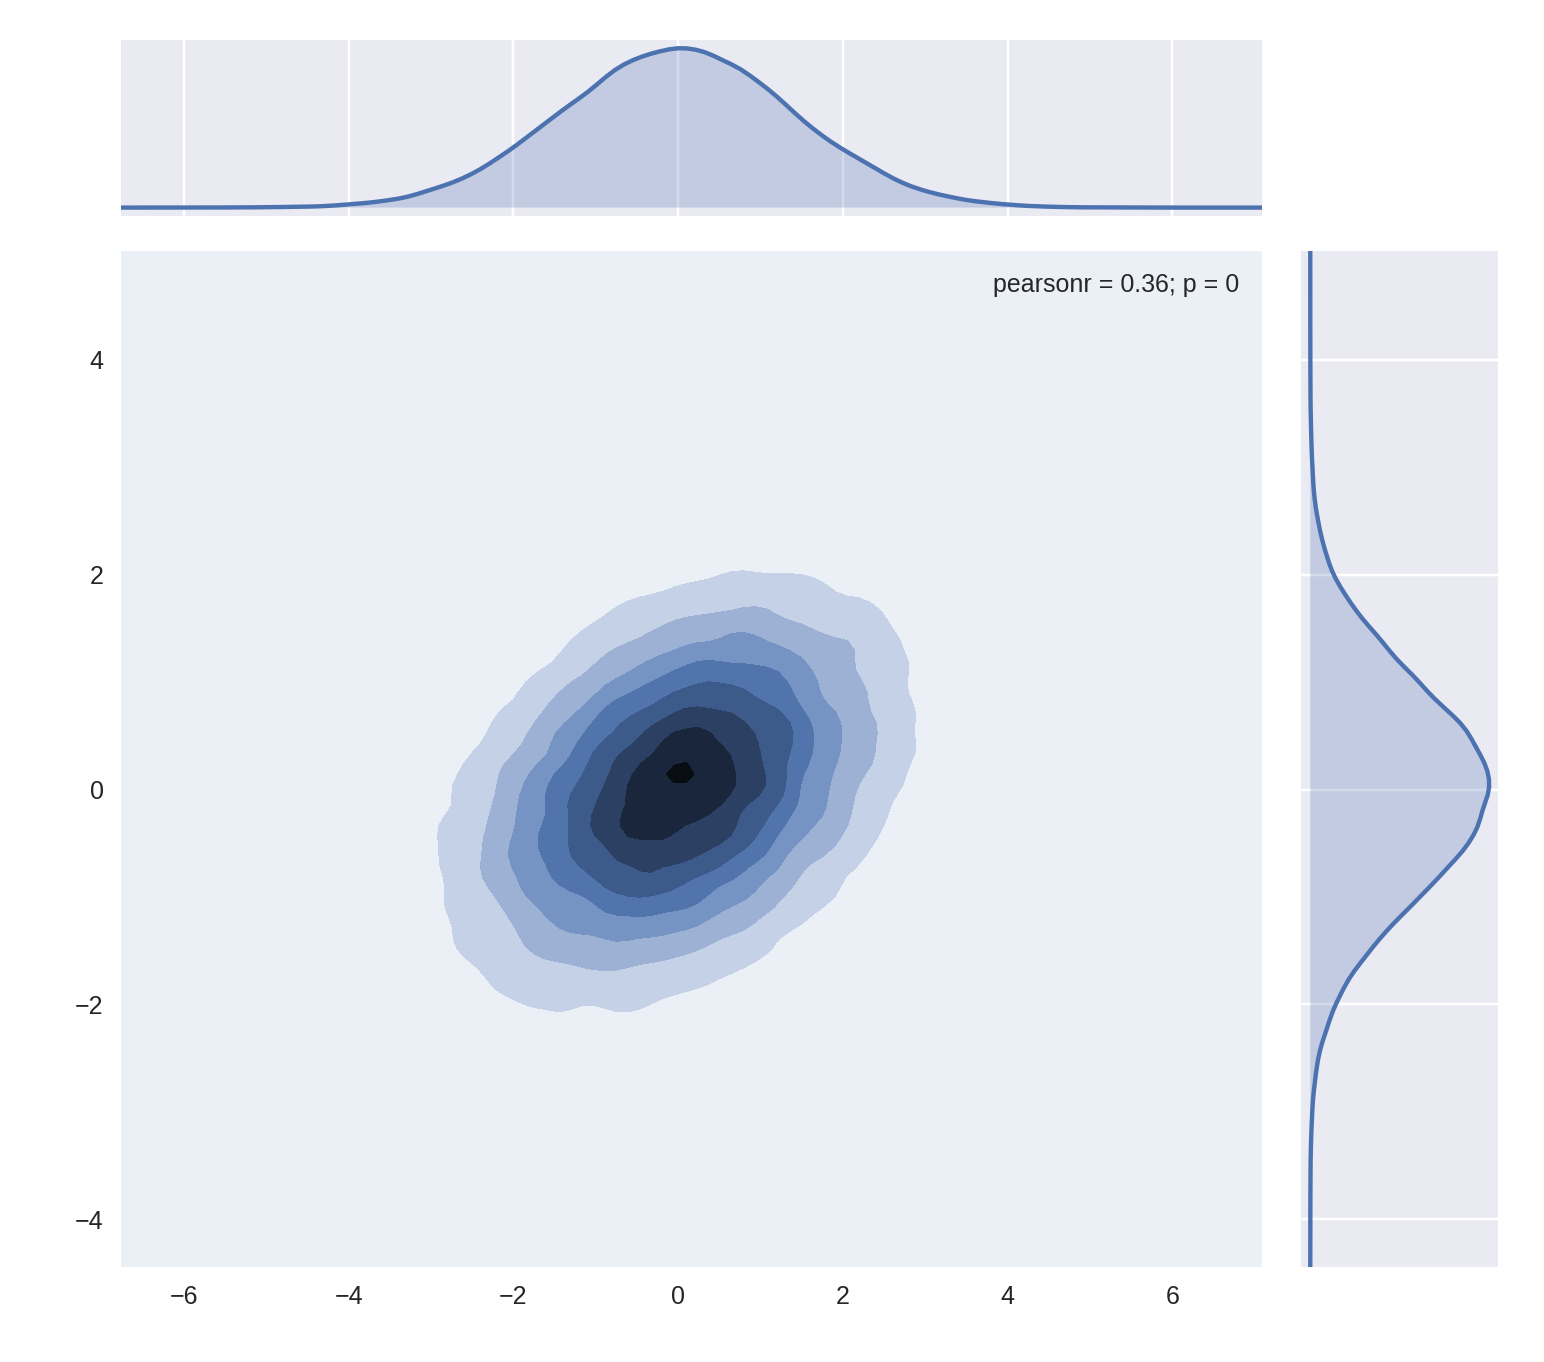

In [7]:
sns.jointplot(x = a, y = b, kind = 'kde')

or without the marginal distributions:

<IPython.core.display.Javascript object>


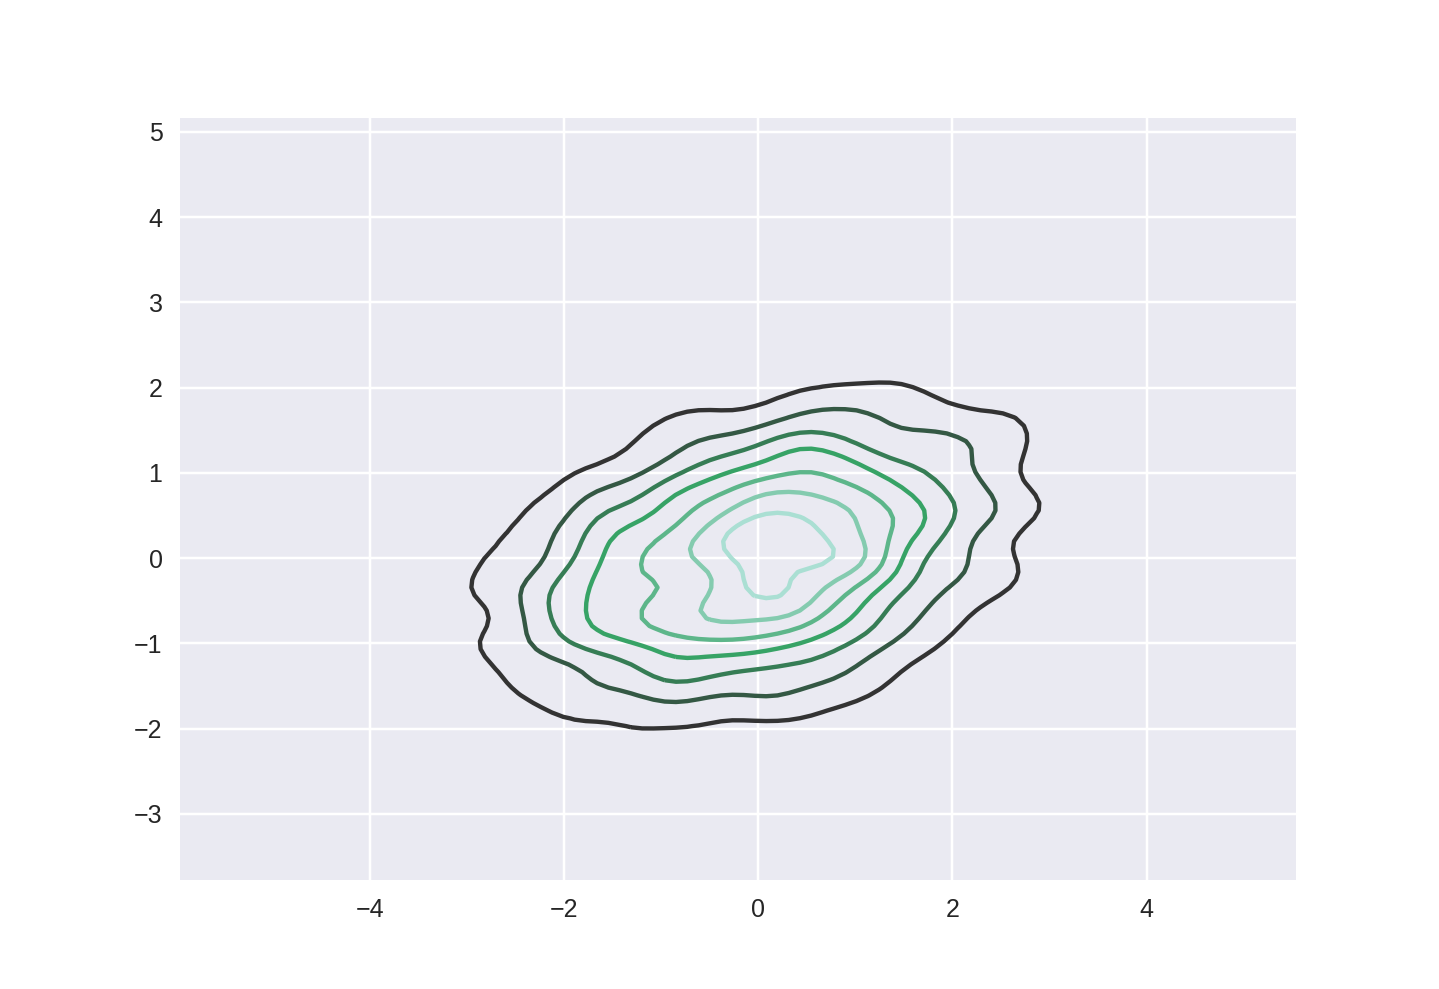

In [8]:
sns.kdeplot(a[:5000], b[:5000])

## Histogram

Often we are interested in the distribution of a single variable which in its simplest form can be shown by a histogram - a nonparametric density estimation. Numpy provides routines for binning (multivariate) data with a specified bin width or a certain number of bins over a range of values. The results of this can then be passed to the matplotlib <i>hist</i> routine. Seaborn also provides a histogram routine  which by default will also fit a KDE: 

<IPython.core.display.Javascript object>


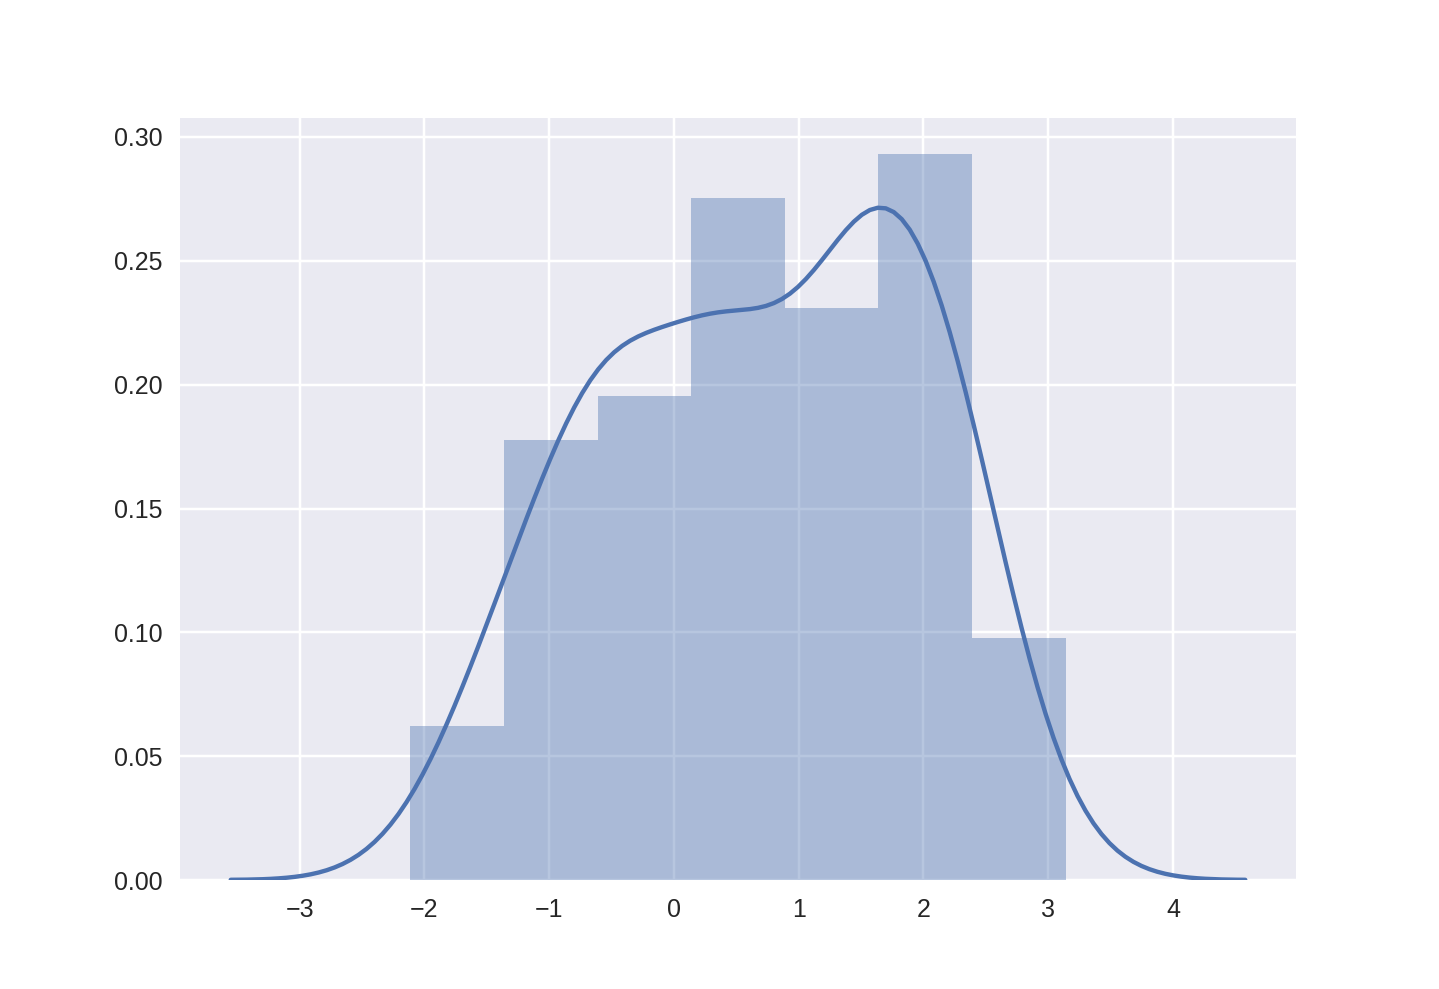

In [9]:
x = np.concatenate([np.random.normal(0., 1., 100), np.random.normal(2, 0.5, 50)])
sns.distplot(x)

But let's build a KDE ourselves:

1.- Phase

<IPython.core.display.Javascript object>


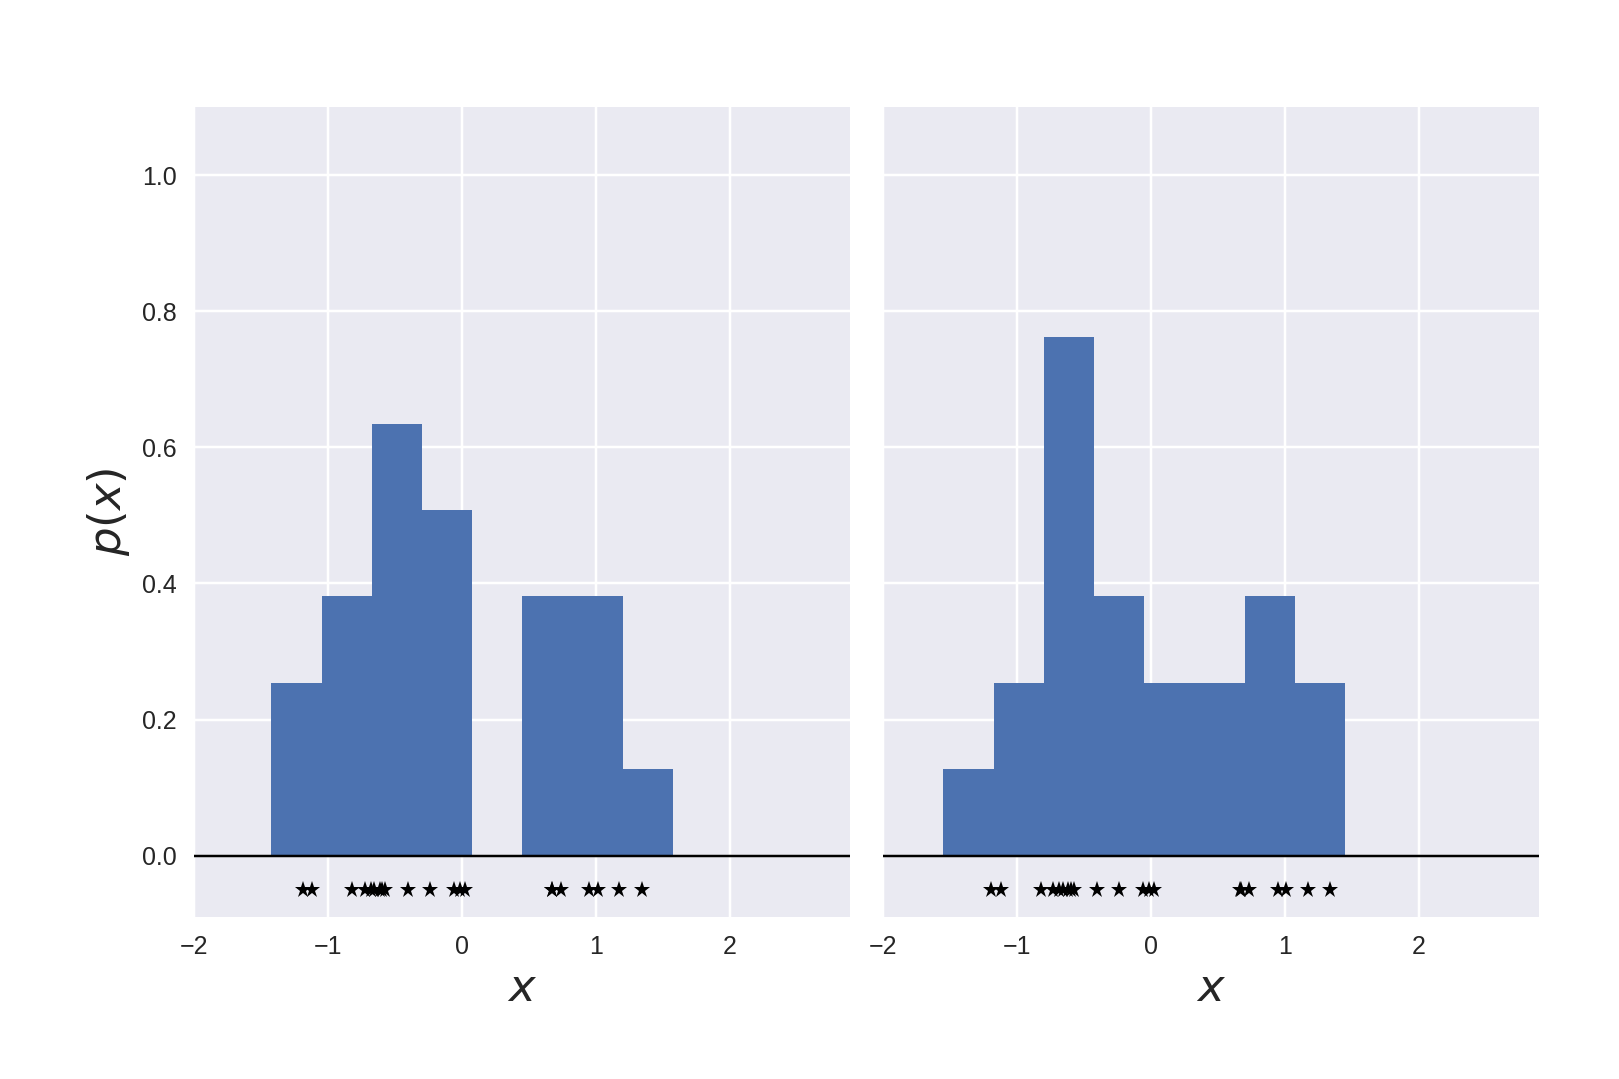

[-1.8   -1.425 -1.05  -0.675 -0.3    0.075  0.45   0.825  1.2    1.575
  1.95   2.325  2.7  ]
[-1.55  -1.175 -0.8   -0.425 -0.05   0.325  0.7    1.075  1.45   1.825  2.2
  2.575  2.95 ]


In [16]:
# We generate data drawn from two normal distributions:
#sns.set()
np.random.seed(1)
x2 = np.concatenate([np.random.normal(-0.5, 0.3, size=14),
                    np.random.normal(1, 0.3, size=7)])

# And visualize phasing effects
fig1 = plt.figure(figsize=(9, 6))
fig1.subplots_adjust(left=0.12, right=0.95, wspace=0.05,
                     bottom=0.15, top=0.9, hspace=0.05)

XLIM = (-2, 2.9)
YLIM = (-0.09, 1.1)

ax = fig1.add_subplot(121)
bins = np.linspace(-1.8, 2.7, 13)
print bins
print bins+0.25
ax.hist(x2, bins=bins, normed=True)
ax.plot(XLIM, [0, 0], '-k', lw=1)
ax.plot(x2, 0 * x2 - 0.05, '*k')
ax.set_xlim(XLIM)
ax.set_ylim(YLIM)
ax.set_xlabel('$x$', fontsize=18)
ax.set_ylabel('$p(x)$', fontsize=18)

ax = fig1.add_subplot(122)
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.hist(x2, bins=bins + 0.25, normed=True)
ax.plot(XLIM, [0, 0], '-k', lw=1)
ax.plot(x2, 0 * x2 - 0.05, '*k')
ax.set_xlim(XLIM)
ax.set_ylim(YLIM)
ax.set_xlabel('$x$', fontsize=18)
#plt.show()

2.- Probability distribution of a given measurement:

<IPython.core.display.Javascript object>


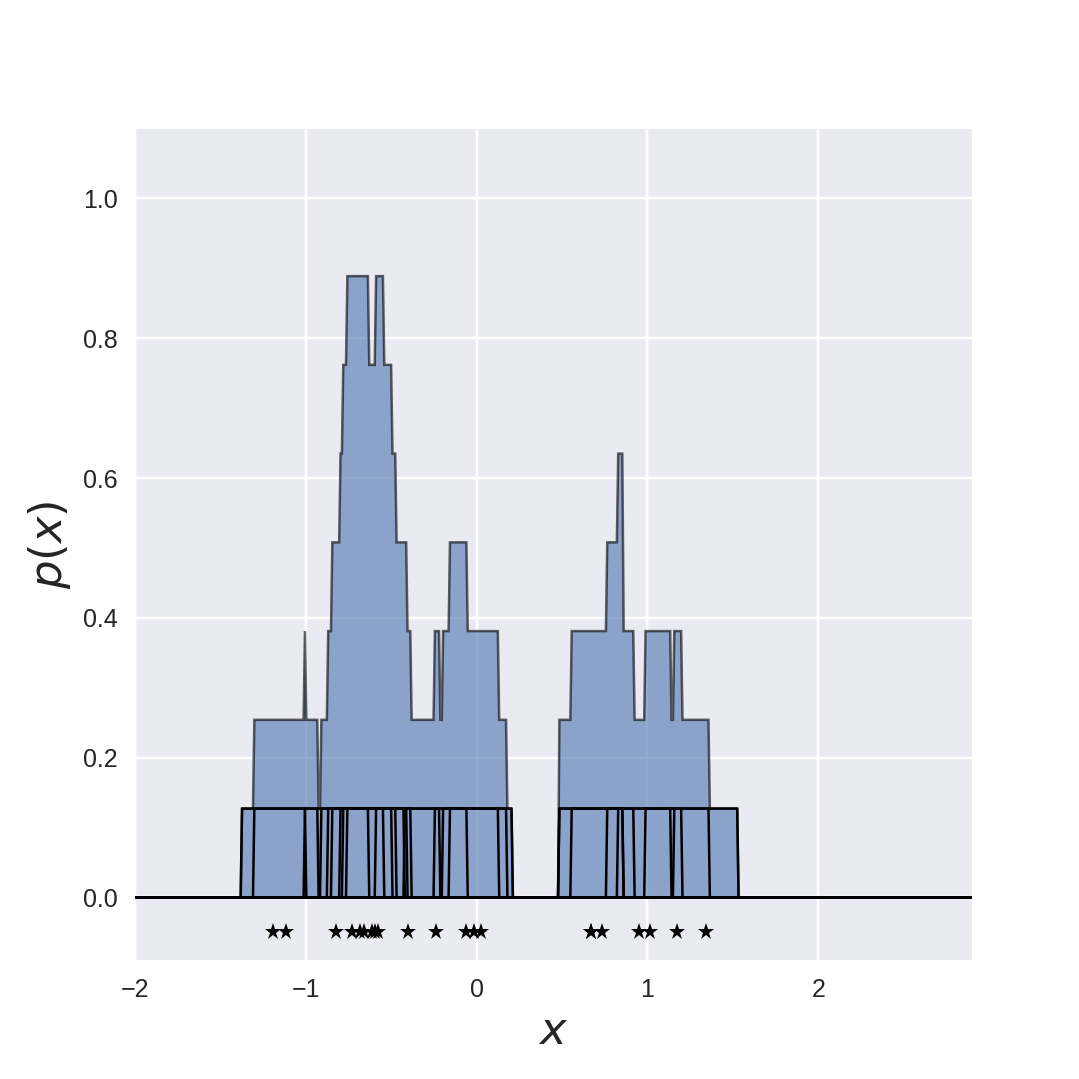

In [18]:
fig2 = plt.figure(figsize=(6, 6))

ax = fig2.add_subplot(111)
binwidth = bins[1] - bins[0]
x_plot = np.linspace(-4, 4, 1000)
y_plot = (abs(x_plot - x2[:, None]) <= 0.5 * binwidth).astype(float)
y_plot /= (binwidth * len(x2))
ax.fill(x_plot, y_plot.sum(0), ec='k', lw=1, alpha=0.6)
ax.plot(x_plot, y_plot.T, '-k', lw=1)
ax.plot(x2, 0 * x2 - 0.05, '*k')
ax.set_xlim(XLIM)
ax.set_ylim(YLIM)
ax.set_ylabel('$p(x)$', fontsize=18)
ax.set_xlabel('$x$', fontsize=18)



<IPython.core.display.Javascript object>


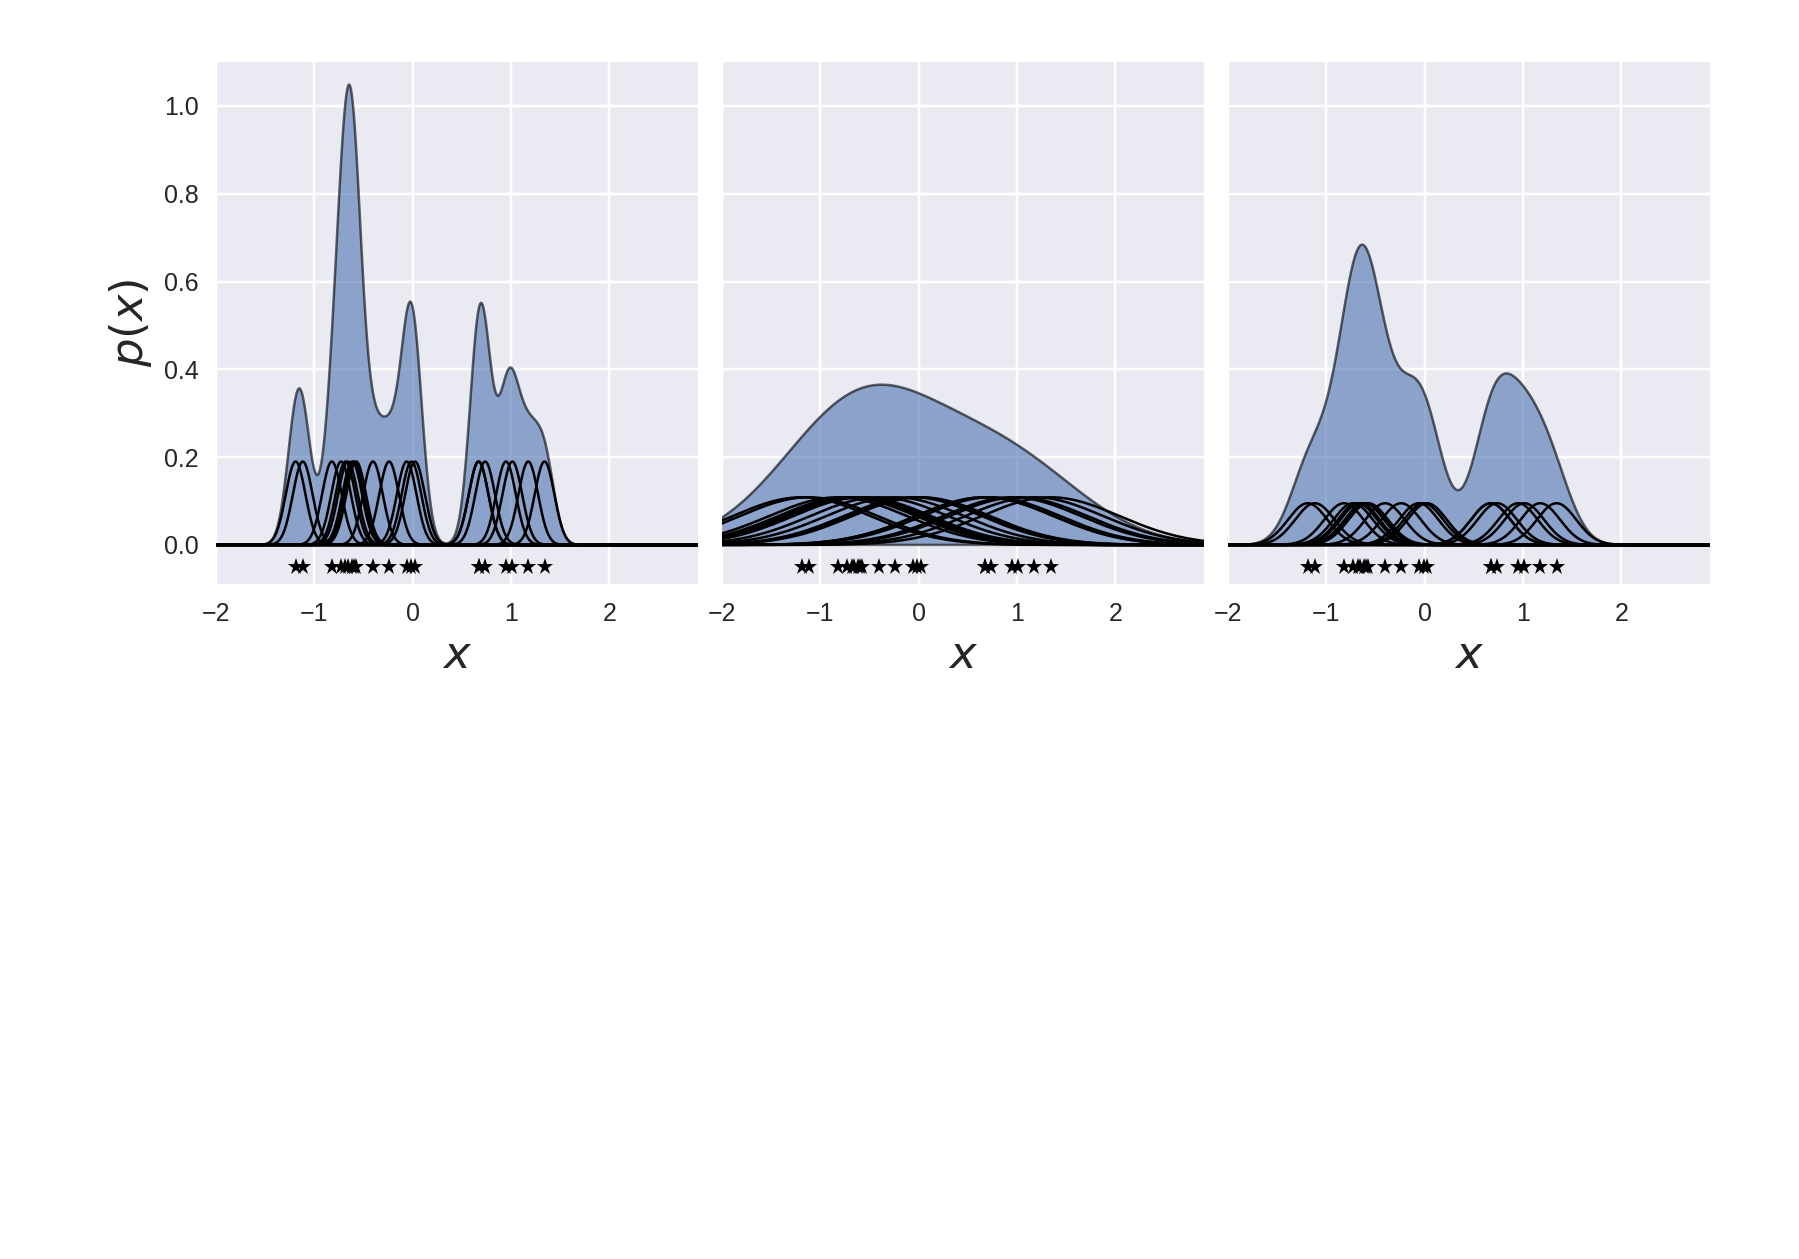

In [20]:
from scipy import stats
fig2 = plt.figure(figsize=(10, 7))
fig2.subplots_adjust(left=0.12, right=0.95, wspace=0.05,
                     bottom=0.1, top=0.95, hspace=0.05)

ax = fig2.add_subplot(231)
binwidth = bins[1] - bins[0]
x_plot = np.linspace(-4, 4, 1000)
y_plot = binwidth * stats.norm.pdf(x_plot, x2[:, None], 0.1)

y_plot /= (binwidth * len(x2))
#y_plot2 = y_plot / (binwidth * len(x))
#print y_plot-y_plot2

ax.fill(x_plot, y_plot.sum(0), ec='k', lw=1, alpha=0.6)
ax.plot(x_plot, y_plot.T, '-k', lw=1)
ax.plot(x2, 0 * x2 - 0.05, '*k')
ax.set_xlim(XLIM)
ax.set_ylim(YLIM)
ax.set_ylabel('$p(x)$', fontsize=18)
ax.set_xlabel('$x$', fontsize=18)

ax = fig2.add_subplot(232)
ax.yaxis.set_major_formatter(plt.NullFormatter())
binwidth = bins[1] - bins[0]
x_plot = np.linspace(-4, 4, 1000)
y_plot = binwidth * stats.norm.pdf(x_plot, x2[:, None], 0.7)
y_plot /= (binwidth * len(x2))
ax.fill(x_plot, y_plot.sum(0), ec='k', lw=1, alpha=0.6)
ax.plot(x_plot, 4 * y_plot.T, '-k', lw=1)
ax.plot(x2, 0 * x2 - 0.05, '*k')
ax.set_xlim(XLIM)
ax.set_ylim(YLIM)
ax.set_xlabel('$x$', fontsize=18)

ax = fig2.add_subplot(233)
ax.yaxis.set_major_formatter(plt.NullFormatter())
binwidth = bins[1] - bins[0]
x_plot = np.linspace(-4, 4, 1000)
y_plot = binwidth * stats.norm.pdf(x_plot, x2[:, None], 0.2)
y_plot /= (binwidth * len(x2))
ax.fill(x_plot, y_plot.sum(0), ec='k', lw=1, alpha=0.6)
ax.plot(x_plot, y_plot.T, '-k', lw=1)
ax.plot(x2, 0 * x2 - 0.05, '*k')
ax.set_xlim(XLIM)
ax.set_ylim(YLIM)
ax.set_xlabel('$x$', fontsize=18)


Nevertheless the bin width (and so number of bins) and bin placement remain somewhat arbitrary. This can affect the interpretation of this histogram as features may be missed. There is also the question of what to do with sparsely sampled bins. There are a number of 'theoretical' recommendations for the number of bins, $k$, to use, such as Sturges's formula $k = \log_2n + 1$, and Simon's rule, $k = 3.5\sigma /n^{1/3}$, but they are all assume an approximately normal distribution.
The Freedman-Diaconis rule attempts to generalize Simon's rule for non-Gaussian distributions: $k = 2.7 \sigma_{IQR} / n^{1/3}$.

From a Bayesian perspective, we can treat the histogram as a piecewise constant model of the underlying density function with the logarithm of the posterior probability then given by Knuth's rule: 

$
N \log M + \log \left[\Gamma\left(\frac{M}{2}\right)\right] - M \log \left[ \Gamma \left(\frac{1}{2} \right) \right] - \log \left[ \Gamma \left(N + \frac{M}{2} \right) \right] + \sum_{k=1}^{M} \log\left[\Gamma\left(n_k + \frac{1}{2}\right)\right]
$

which is maximized by the number of bins, $M$, with $n_k$ measurements in bin $k$.

An alternate solution is to relax the idea of a fixed bin width and instead allos uneven (arbitrary) bin widths. Factoring this into the methodology behind Knuth's rule gives <i>Bayesian blocks</i>. An additional feature of Bayesian blocks is that they are an optimal binning and so statistical significance can be assigned to the bin configuration. This has signal detection applications in time domain astronomy.

Fortunately, these various binning systems are available with the <i>astroML.plotting</i> package <i>hist</i>, that has been ported to astropy too (and even just numpy also has some of these rules implemented):

<IPython.core.display.Javascript object>


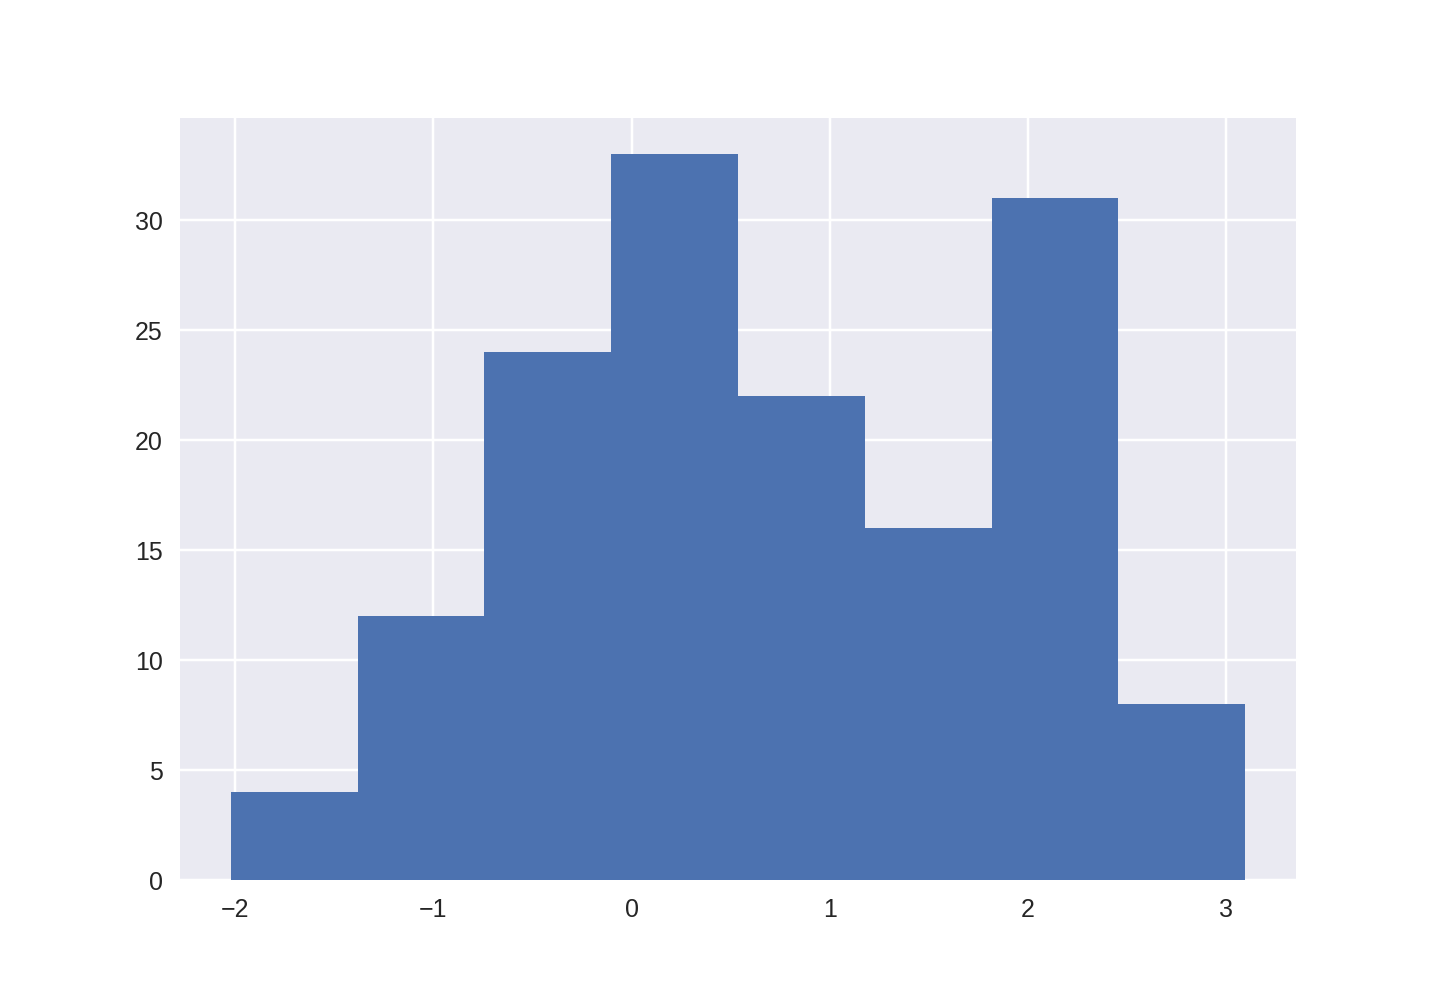

(array([  4.,  12.,  24.,  33.,  22.,  16.,  31.,   8.]),
 array([-2.02220122, -1.38250733, -0.74281345, -0.10311956,  0.53657432,
         1.17626821,  1.81596209,  2.45565598,  3.09534986]),
 <a list of 8 Patch objects>)

In [25]:
from astropy.visualization import hist
x = np.concatenate([np.random.normal(0., 1., 100), np.random.normal(2, 0.5, 50)])
hist(x, bins = 'knuth')

<IPython.core.display.Javascript object>


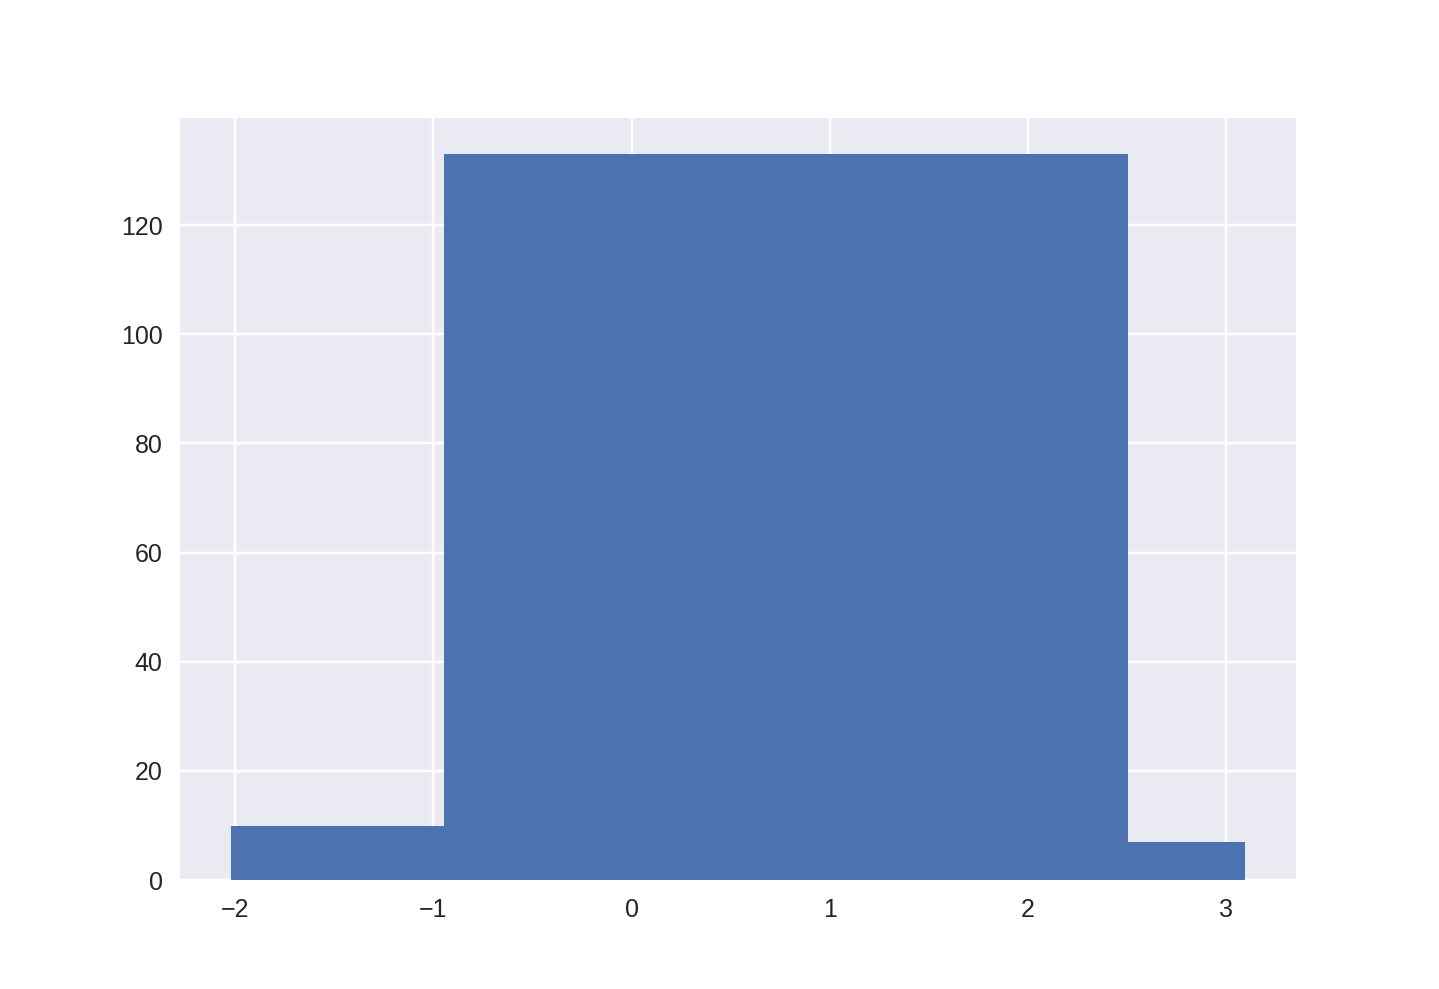

(array([  10.,  133.,    7.]),
 array([-2.02220122, -0.94473502,  2.50628995,  3.09534986]),
 <a list of 3 Patch objects>)

In [26]:
hist(x, bins = 'blocks')

## Multidimensional data

The human brain is capable of comprehending about eleven dimensions of information at a given instance. It is possible to represent a low multidimensional data set (3 < d < 11) via a scatter plot with appropriate choices of marker shape, size, color, transparency, etc., to capture the ranges of values along additional axes. Alternate ways to represent such data are scatter grids where scatter plots for all possible pair combinations of variables are shown and parallel coordinate plots. In the latter, each dimension is represented a parallel axis and a data point is a polyline across the axes.

<IPython.core.display.Javascript object>


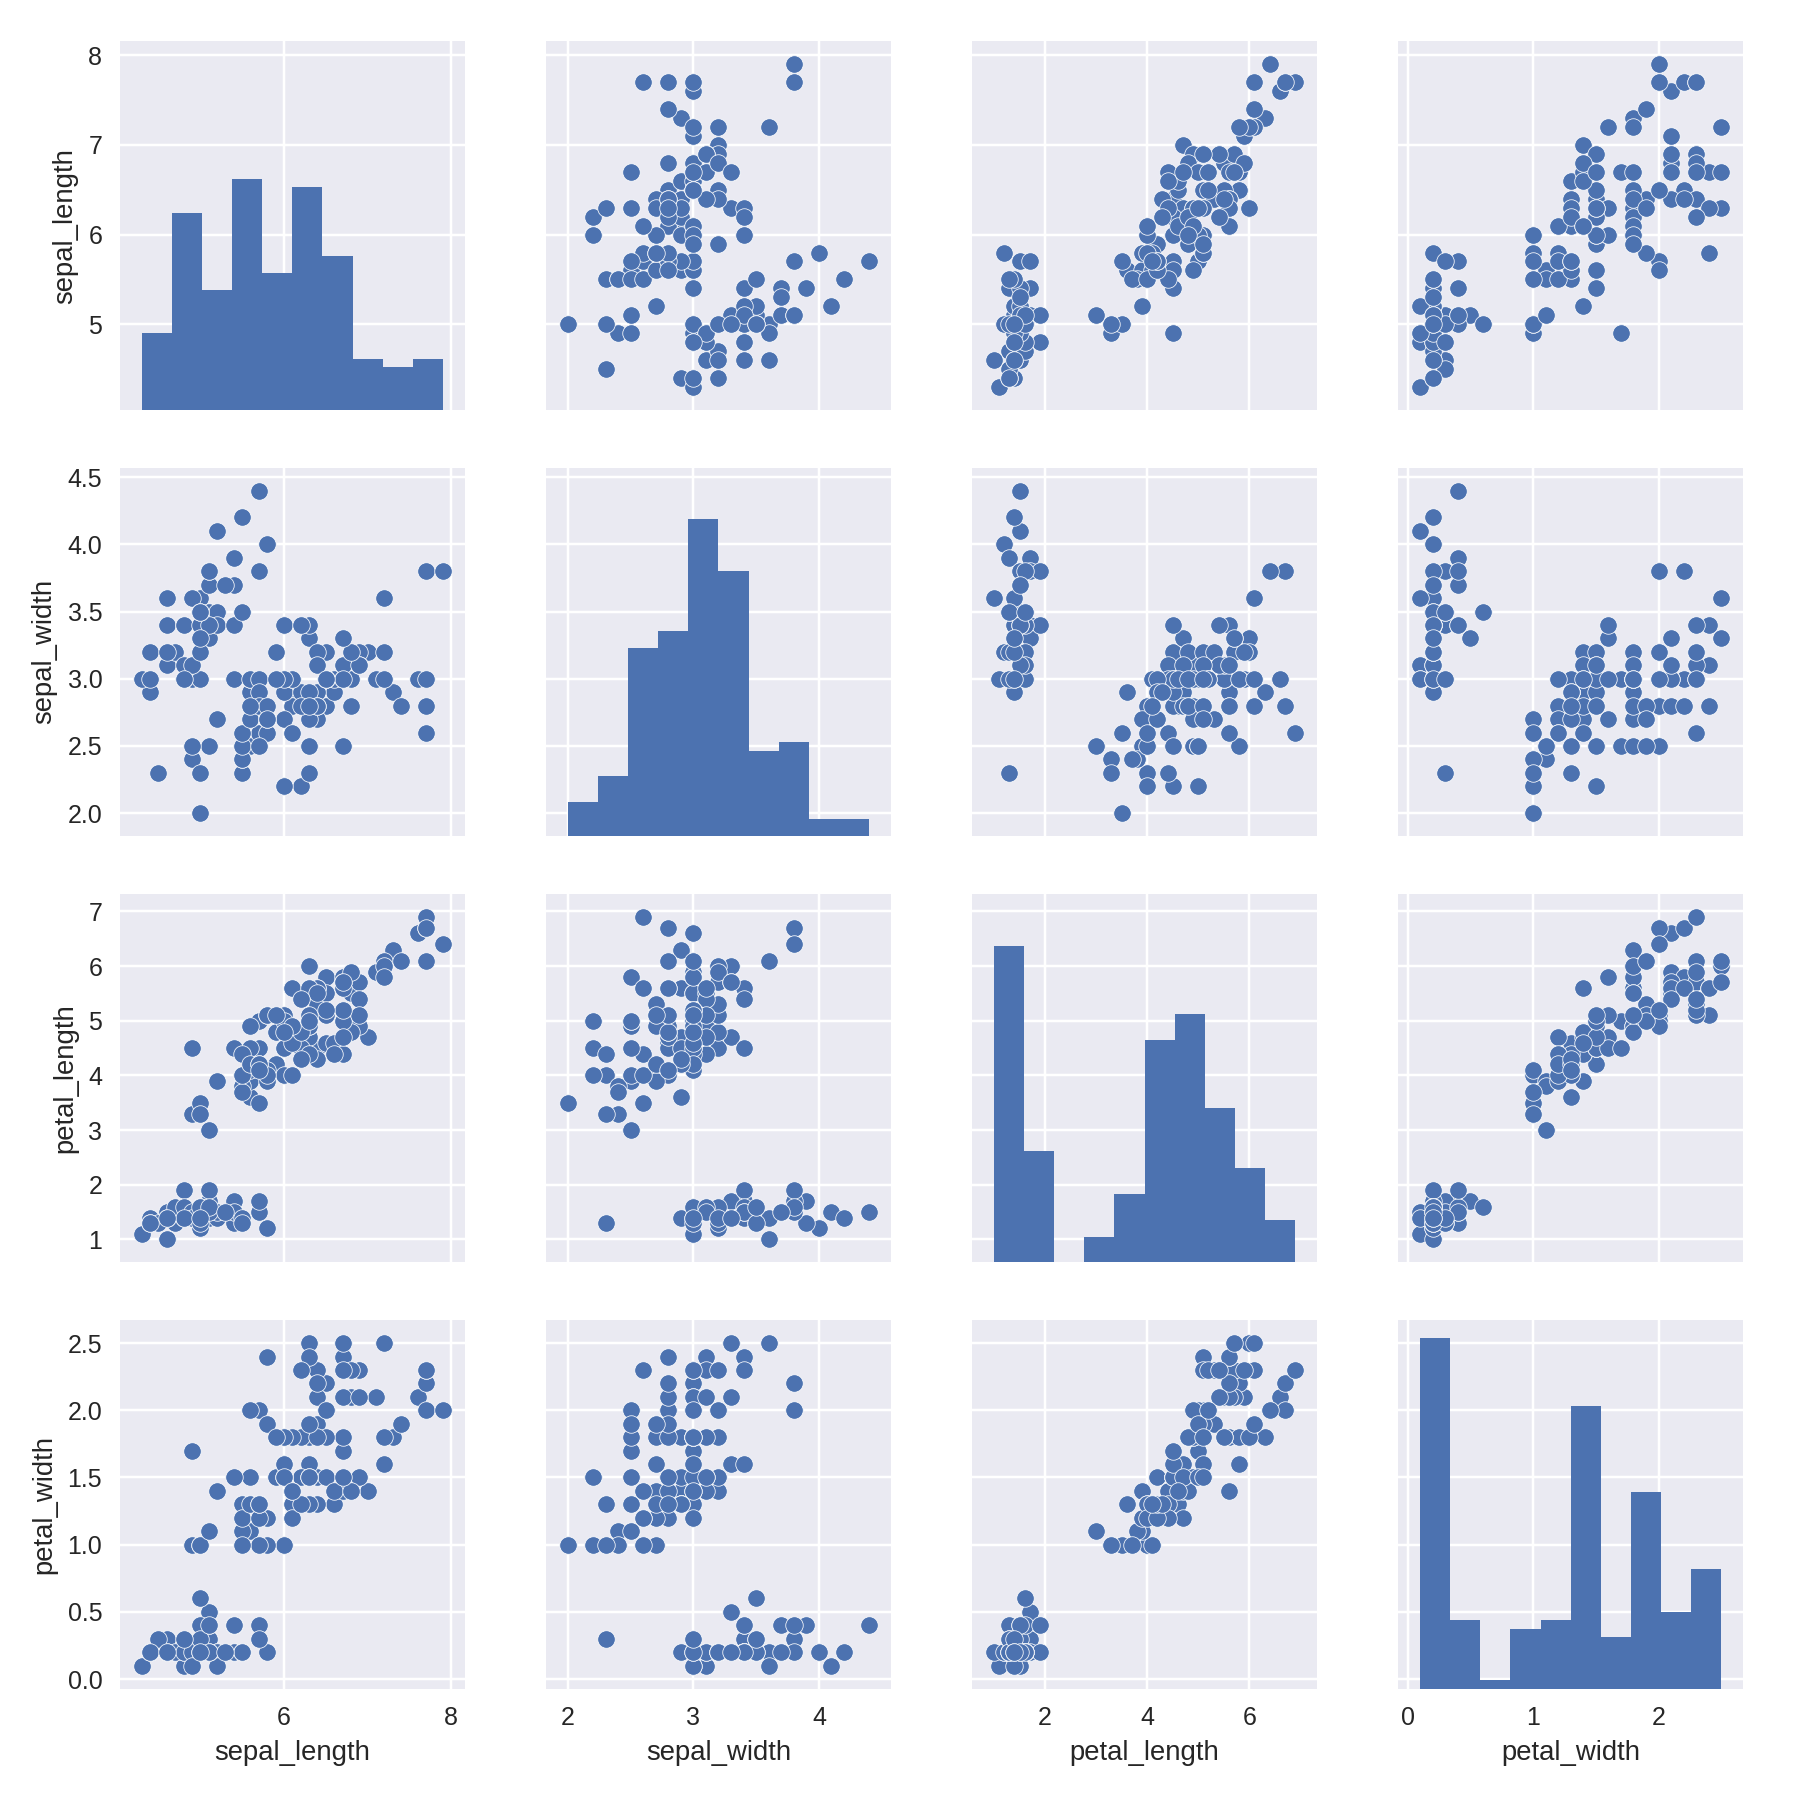

In [27]:
iris = sns.load_dataset("iris")
sns.pairplot(iris)

## "Multiformat" data

In [7]:
from __future__ import print_function
import ipyaladin as ipyal


In [8]:
aladin= ipyal.Aladin(target='messier 51', fov=1)
aladin

In [9]:
aladin.target= 'NGC 2175'


In [10]:
aladin.fov= 2


In [11]:
aladin.survey= 'P/allWISE/color'


In [12]:
aladin.coo_frame= 'galactic'

In [13]:
aladin= ipyal.Aladin(survey= 'P/DSS2/red',
                              fov= 10,
                              target= 'LMC',
                              reticle_color= '#ff89ff')
aladin

In [14]:
url= 'http://vizier.u-strasbg.fr/viz-bin/votable?-source=HIP2&-c=LMC&-out.add=_RAJ,_DEJ&-oc.form=dm&-out.meta=DhuL&-out.max=9999&-c.rm=180'
options= {'sourceSize':12, 'color': '#f08080'}
aladin.add_catalog_from_URL(url, options)


In [15]:
def getObjectData(data):
    return data

def getObjectRaDecProduct(data):
    return data['ra']*data['dec']

# when trigerred, the listeners on the js side of the application will send a json object whose parameter data
# will be used by the python functions
# (data is a litteral object on the js side, it will be converted as a dictionary object on the python side)
aladin.add_listener('objectHovered', getObjectRaDecProduct)
aladin.add_listener('objectClicked', getObjectData)

In [16]:
aladin_bis= ipyal.Aladin(target='269.956288 -23.823863', fov=1)
aladin_bis

In [19]:
from astroquery.simbad import Simbad
import astropy.units as u


In [20]:
Simbad.SIMBAD_URL = 'http://simbad.harvard.edu/simbad/sim-script'
table = Simbad.query_region("m1", radius=0.05 * u.deg)

In [21]:
aladin= ipyal.Aladin(fov= 0.25, target= 'm1')
aladin

In [22]:
aladin.add_table(table)

## Glue

In [12]:
import pandas as pd
from astropy.table import Table
from glue import qglue

x = [1, 2, 3]
y = [2, 3, 4]

u = [10, 20, 30, 40]
v = [20, 40, 60, 80]

pandas_data = pd.DataFrame({'x': x, 'y': y})
dict_data = {'u': u, 'v': v}
recarray_data = np.rec.array([(0, 1), (2, 3)],
                             dtype=[('a', 'i'), ('b', 'i')])
astropy_table = Table({'x': x, 'y': y})
bad_data = {'x': x, 'u':u}

In [13]:
qglue(xy=pandas_data)

In [14]:
qglue(xy=pandas_data, uv=dict_data)

## Demo of Topcat, Aladin, VOSA comm SAMP
